# By- Harshul Gupta

###  GRIP Data Science and Business Analytics
### Task-2

### Prediction using Unsupervised ML

In [1]:
#Importing the neccessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [24]:
# Loading the Dataset
data = pd.read_csv('Iris.csv')

In [31]:
#Printing the top rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [121]:
# Taking only the required rows form the dataset
iris_df = data.iloc[:,1:-1]

In [122]:
# Checking the dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [194]:
# Checking for the null values and datatypes present in the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


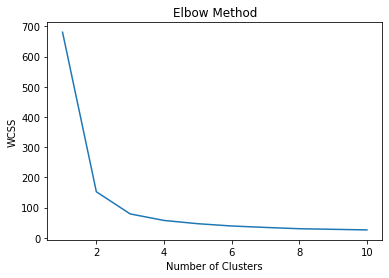

In [124]:
# Using the Elbow Method to find the suitable number of clusters

x = iris_df.values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

__Using the elbow method we had determined that the best suited number of clusters for the dataset i.e., the number of classes, is 3. Hence, we will divide our dataset into 3 classes.__

In [190]:
# A function for making the clusters using K-means Clustering and then plotting the clusters 


def pre(l):
    """
    Enter the numner of columns to use as the attributes for making the clusters.
    Using this function we can check for different columns how the clusters are forming
    
    """
    
    #Making the K-menas Clustering
    
    x = iris_df.iloc[:,l].values

    from sklearn.cluster import KMeans
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',
                       max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x)

    
    # Plotting the clusters 
    

    plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
               s = 100, c= 'red', label = 'Iris-setosa')
    plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
               s = 100, c= 'blue', label = 'Iris-setosa')
    plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
               s = 100, c= 'green', label = 'Iris-setosa')

    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
               s = 100, c= 'yellow', label = 'Iris-setosa')
    plt.legend()
    plt.title("For the columns {}".format(l))
    plt.show()
    
    

### Now we will test which columns are giving us the best suited clusters

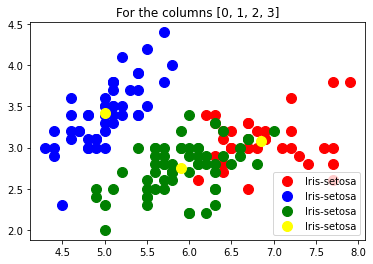

In [191]:
pre([0,1,2,3])

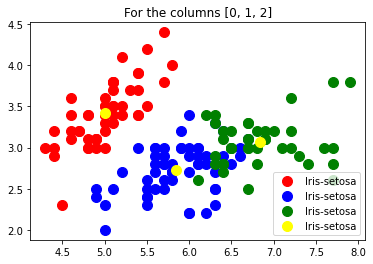

In [192]:
pre([0,1,2])

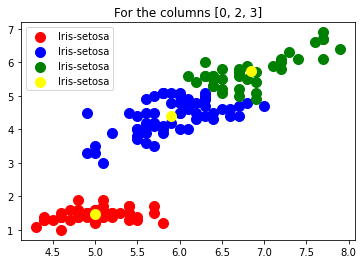

In [193]:
pre([0,2,3])

## Result

__As we can see for columns 0,2 and 3 i.e., for SepalLengthCm, PetalLengthCm and PetalWidthCm, we are getting the best possible clusters__